<h1>Time Series Transformation</h1>

<h2 align="center">Differentiation</h2>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


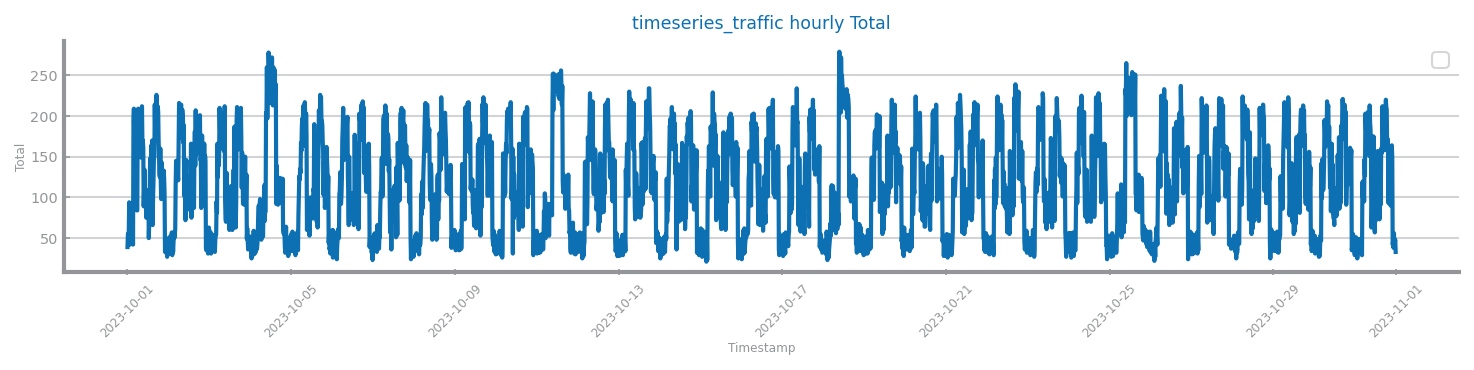

In [1]:
from pandas import read_csv, DataFrame, Series
from matplotlib.pyplot import figure, show
from dslabs_functions import plot_line_chart, HEIGHT

file_tag = "timeseries_traffic"
target = "Total"
data: DataFrame = read_csv(
    "../../../data/forecast_traffic_single.csv",
    index_col="Timestamp",
    sep=",",
    decimal=".",
    parse_dates=True,
    infer_datetime_format=True,
)
series: Series = data[target]

figure(figsize=(3 * HEIGHT, HEIGHT / 2))
plot_line_chart(
    series.index.to_list(),
    series.to_list(),
    xlabel=series.index.name,
    ylabel=target,
    title=f"{file_tag} hourly {target}",
)
show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


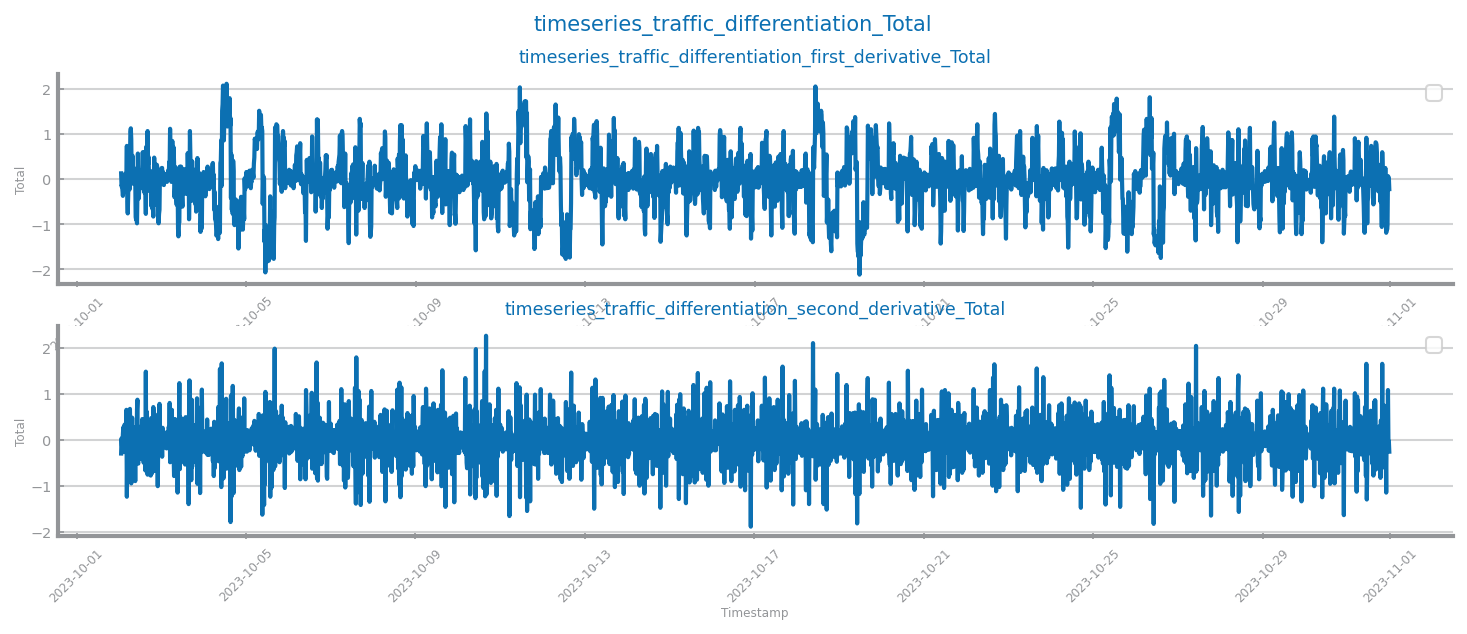

In [17]:
from dslabs_functions import plot_line_chart
from matplotlib.pyplot import subplots
import matplotlib.pyplot as plt

diff = ["first_derivative", "second_derivative"]
fig, axs = subplots(len(diff), 1, figsize=(3 * HEIGHT, HEIGHT / 2 * len(diff)))
fig.suptitle(f"{file_tag}_differentiation_{target}")
series: Series = series.rolling(window=100).mean()

ss_diff = series
for d in range(len(diff)):
    ss_diff: Series = ss_diff.diff()
    plot_line_chart(
        ss_diff.index.to_list(),
        ss_diff.to_list(),
        title=f"{file_tag}_differentiation_{diff[d]}_{target}",
        xlabel=series.index.name,
        ylabel=target,
        ax=axs[d],
    )
plt.savefig(f"{file_tag}_differentiation_{target}")
show()

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from dslabs_functions import series_train_test_split
import pandas as pd
from pandas import read_csv, DataFrame, Series
from matplotlib.pyplot import figure, show
import matplotlib.pyplot as plt
from dslabs_functions import plot_line_chart, ts_aggregation_by, HEIGHT
import numpy as np

file_tag = "timeseries_traffic"
target = "Total"
data: DataFrame = read_csv(
    "../../../data/forecast_traffic_single.csv",
    index_col="Timestamp",
    sep=",",
    decimal=".",
    parse_dates=True,
    infer_datetime_format=True,
)

series: Series = data[target]
ss_smooth: Series = series.rolling(window=100).mean()

ss_diff: Series = ss_smooth.diff()
ss_diff: Series = ss_diff.diff()


# Assuming 'series' is your time series data
train_series, test_series = series_train_test_split(ss_diff)

data_to_save = pd.DataFrame({
    'Timestamp': ss_diff.index.to_list(),
    'Total': ss_diff.to_list(),  # Replace with your series name if different
    # Add more columns if you have additional series data to save
})

data_to_save_train = pd.DataFrame({
    'Timestamp': train_series.index.to_list(),
    'Total': train_series.to_list(),  # Replace with your series name if different
    # Add more columns if you have additional series data to save
})

data_to_save_test = pd.DataFrame({
    'Timestamp': test_series.index.to_list(),
    'Total': test_series.to_list(),  # Replace with your series name if different
    # Add more columns if you have additional series data to save
})

# Export the DataFrame to a CSV file
data_to_save.to_csv('forecast_traffic_transformed.csv', index=False)
data_to_save_train.to_csv('forecast_traffic_transformed_train.csv', index=False)
data_to_save_test.to_csv('forecast_traffic_transformed_test.csv', index=False)

<Figure size 1800x300 with 0 Axes>

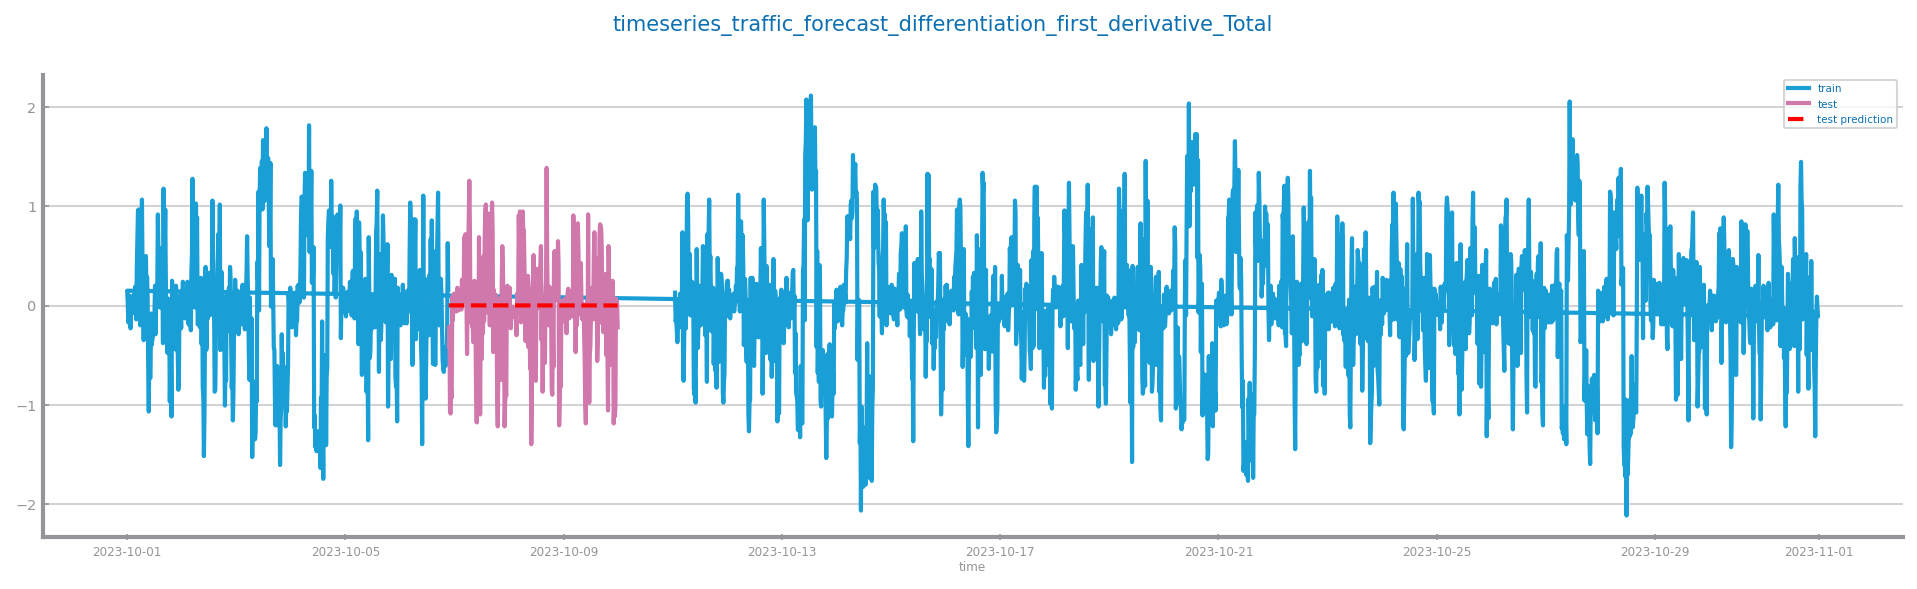

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from dslabs_functions import series_train_test_split
import pandas as pd
from pandas import read_csv, DataFrame, Series
from matplotlib.pyplot import figure, show
import matplotlib.pyplot as plt
from dslabs_functions import plot_line_chart, ts_aggregation_by, HEIGHT, plot_forecasting_eval, plot_forecasting_series
import numpy as np

file_tag = "timeseries_traffic"
target = "Total"
data: DataFrame = read_csv(
    "../../../data/forecast_traffic_single.csv",
    index_col="Timestamp",
    sep=",",
    decimal=".",
    parse_dates=True,
    infer_datetime_format=True,
)

series: Series = data[target]
ss_smooth: Series = series.rolling(window=100).mean()

ss_diff: Series = ss_smooth.diff()
#ss_diff: Series = ss_diff.diff()


# Assuming 'series' is your time series data
train_series, test_series = series_train_test_split(ss_diff)

# Creating the predictor variable (X) - using timestamps directly
X_train = train_series.index.values.astype('datetime64[s]').astype(int).reshape(-1, 1)
X_test = test_series.index.values.astype('datetime64[s]').astype(int).reshape(-1, 1)

# Reshape the target variable (y)
y_train = train_series.values
y_test = test_series.values
y_train = np.nan_to_num(y_train, nan=0)

# Initializing and fitting the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions on the test set
predictions = model.predict(X_test)
predictions_train = model.predict(X_train)
predictions_test = model.predict(X_test)


future_timestamps = test_series.index  # Change this to your future timestamps

# Creating a pandas Series for the forecasted values with the corresponding timestamps
forecast_series = pd.Series(predictions.flatten(), index=future_timestamps)

# Optionally, you can concatenate the train_series and forecast_series for visualization or further analysis
combined_series = pd.concat([train_series, forecast_series])

figure(figsize=(3 * HEIGHT, HEIGHT / 2))
plot_forecasting_series(
    trn=train_series,
    tst=test_series,
    prd_tst=forecast_series,
    title=f"{file_tag}_forecast_differentiation_first_derivative_{target}",
)
# plot_forecasting_eval(
#     trn=np.nan_to_num(train_series, nan=0),
#     tst=test_series,
#     prd_trn=predictions_train,
#     prd_tst=predictions_test,
#     title=f"{file_tag}_evaluation_forecast_differentiation_second_derivative_{target}"
# )
plt.savefig(f"{file_tag}_forecast_differentiation_first_derivative_{target}")
show()

<h3>Multivariate Time Series</h3>

In [ ]:
from dslabs_functions import plot_ts_multivariate_chart

file_tag = "Consumption"
target = "Appliances"
data: DataFrame = read_csv(
    "data/time_series/appliances.csv",
    index_col="date",
    sep=",",
    decimal=".",
    parse_dates=True,
    infer_datetime_format=True,
)

plot_ts_multivariate_chart(data, title=f"{file_tag} {target}")
show()

In [ ]:
diff_df: DataFrame = data.diff()

plot_ts_multivariate_chart(
    diff_df, title=f"{file_tag} {target} - after first differentiation"
)
show()